# Insertando, Eliminando y Editando un Dataframe nuevo

In [1]:
# Nuevo Dataframe
import pandas as pd

clase = [('Jorge', 22, 'MX'),
        ('Anita', 31, 'MX'),
        ('Raul', 16, 'BR'),
        ('Simon', 41, 'BR'),
        ('Diego', 33, 'PA'),
        ('Jorge', 35, 'PA'),
        ('Almendra', 35, 'COL'),
        ('Mary', 35, 'COL'),
        ('Peter', 35, 'EC'),
        ('Andrés', 35, 'EC')]

df_clase = pd.DataFrame(clase, columns=['Nombre', 'Edad', 'País'],)
df_clase

,Nombre,Edad,País
0,Jorge,22,MX
1,Anita,31,MX
2,Raul,16,BR
3,Simon,41,BR
4,Diego,33,PA
5,Jorge,35,PA
6,Almendra,35,COL
7,Mary,35,COL
8,Peter,35,EC
9,Andrés,35,EC


In [2]:
# Ordeno la clase por edad
df_clase.sort_values(by='Edad')

,Nombre,Edad,País
2,Raul,16,BR
0,Jorge,22,MX
1,Anita,31,MX
4,Diego,33,PA
5,Jorge,35,PA
6,Almendra,35,COL
7,Mary,35,COL
8,Peter,35,EC
9,Andrés,35,EC
3,Simon,41,BR


In [4]:
# Llega un alumno nuevo
new_row = pd.DataFrame({'Nombre': ['Isabel'], 'Edad': [35], 'País': ['PER']})
df_clase = pd.concat([df_clase, new_row], ignore_index=True)
df_clase

,Nombre,Edad,País
0,Jorge,22,MX
1,Anita,31,MX
2,Raul,16,BR
3,Simon,41,BR
4,Diego,33,PA
5,Jorge,35,PA
6,Almendra,35,COL
7,Mary,35,COL
8,Peter,35,EC
9,Andrés,35,EC


In [5]:
# Para eliminar un registro basado en el índice
df_clase.drop(df_clase.index[10])

,Nombre,Edad,País
0,Jorge,22,MX
1,Anita,31,MX
2,Raul,16,BR
3,Simon,41,BR
4,Diego,33,PA
5,Jorge,35,PA
6,Almendra,35,COL
7,Mary,35,COL
8,Peter,35,EC
9,Andrés,35,EC


In [6]:
df_clase

,Nombre,Edad,País
0,Jorge,22,MX
1,Anita,31,MX
2,Raul,16,BR
3,Simon,41,BR
4,Diego,33,PA
5,Jorge,35,PA
6,Almendra,35,COL
7,Mary,35,COL
8,Peter,35,EC
9,Andrés,35,EC


In [7]:
# ¿Por qué no se eliminó Isabel? Muy importante asignar el df a la función
df_clase = df_clase.drop(df_clase.index[10])
df_clase

,Nombre,Edad,País
0,Jorge,22,MX
1,Anita,31,MX
2,Raul,16,BR
3,Simon,41,BR
4,Diego,33,PA
5,Jorge,35,PA
6,Almendra,35,COL
7,Mary,35,COL
8,Peter,35,EC
9,Andrés,35,EC


In [8]:
# Podría eliminar más de un registro
# Tener cuidado con el doble corchete!!
df_clase.drop(df_clase.index[[8, 9]])

,Nombre,Edad,País
0,Jorge,22,MX
1,Anita,31,MX
2,Raul,16,BR
3,Simon,41,BR
4,Diego,33,PA
5,Jorge,35,PA
6,Almendra,35,COL
7,Mary,35,COL


In [9]:
df_clase

,Nombre,Edad,País
0,Jorge,22,MX
1,Anita,31,MX
2,Raul,16,BR
3,Simon,41,BR
4,Diego,33,PA
5,Jorge,35,PA
6,Almendra,35,COL
7,Mary,35,COL
8,Peter,35,EC
9,Andrés,35,EC


In [10]:
# Para modificar un registro se puede localizar con .at
df_clase.at[3, 'Nombre'] = 'José'
df_clase

,Nombre,Edad,País
0,Jorge,22,MX
1,Anita,31,MX
2,Raul,16,BR
3,José,41,BR
4,Diego,33,PA
5,Jorge,35,PA
6,Almendra,35,COL
7,Mary,35,COL
8,Peter,35,EC
9,Andrés,35,EC


In [11]:
# Para más de un registro se puede usar .loc, y además hacerlo para múltiples columnas
df_clase.loc[1:2, ['Edad', 'País']] = [32, 'ARG']
df_clase

,Nombre,Edad,País
0,Jorge,22,MX
1,Anita,32,ARG
2,Raul,32,ARG
3,José,41,BR
4,Diego,33,PA
5,Jorge,35,PA
6,Almendra,35,COL
7,Mary,35,COL
8,Peter,35,EC
9,Andrés,35,EC


In [12]:
# Finalmente, se puede usar .replace
df_clase.replace("PA", "PAN", inplace=True)
df_clase

,Nombre,Edad,País
0,Jorge,22,MX
1,Anita,32,ARG
2,Raul,32,ARG
3,José,41,BR
4,Diego,33,PAN
5,Jorge,35,PAN
6,Almendra,35,COL
7,Mary,35,COL
8,Peter,35,EC
9,Andrés,35,EC


# Wrap up
- Importación de Datos con pandas (csv).
- Uso de dataframes.
- Metadata del dataframe.
- Cuenta de registros.
- Modificación de tipos de columna.
- Nuevas columnas.
- Masajeo simple de datos de columnas.
- Descripción de columnas.
- Búsqueda de datos y primeros insights.
- Filtrado de registros basados en condición.
- Generar un DF, añadir, eliminar y editar datos.

## Código anterior

In [39]:
import pandas as pd
import numpy as np
import os

os.chdir('/users/memobarbosa/Análisis de datos/Parte 2/M16 - Data Massaging 1')

df = pd.read_csv('netflix_titles.csv')
df["duration_num"] = df["duration"]
df["duration_unit"] = ""

stringcols = df.select_dtypes(include="object").columns
df[stringcols] = df[stringcols].fillna("").astype(pd.StringDtype())

df["duration_unit"] = "min"

df["duration_unit"] = df["duration_unit"].where(df.duration_num.str.endswith("min"), "season")

df["duration_num"] = df["duration_num"].replace({" min": "", " Season": "", " Seasons": "", "s": ""}, regex=True)

df["duration_num"] = pd.to_numeric(df['duration_num'])

df.at[5541, "duration_unit"] = "min"
df.at[5794, "duration_unit"] = "min"
df.at[5813, "duration_unit"] = "min"

df.at[5541, "duration_num"] = 74
df.at[5794, "duration_num"] = 84
df.at[5813, "duration_num"] = 66

df.at[5541, "duration"] = "74 min"
df.at[5794, "duration"] = "84 min"
df.at[5813, "duration"] = "66 min"

df_temp = df.groupby('release_year').size().rename('movies').reset_index()
df_temp = df_temp.sort_values(by='release_year', ascending=False)[:20]

In [40]:
df["duration_num"] = df["duration_num"].astype('int64')

## Código actual

In [41]:
import seaborn as sns
sns.set()
%matplotlib inline

/Users/memobarbosa/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


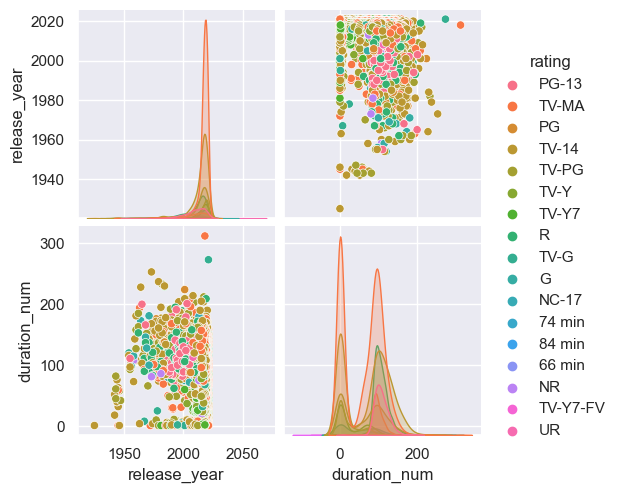

In [43]:
# Visualize pairplot of df

sns.pairplot(df, hue='rating')

/Users/memobarbosa/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


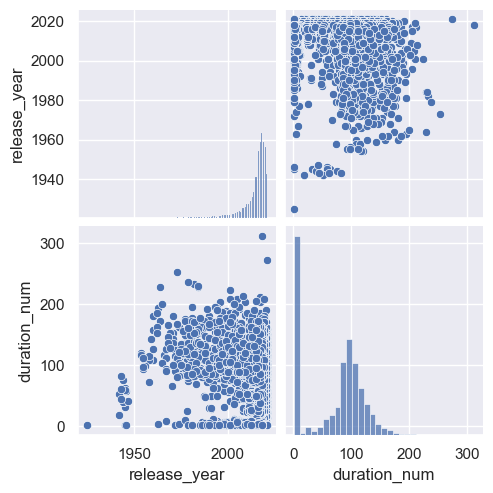

In [44]:
sns.pairplot(df)

/Users/memobarbosa/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


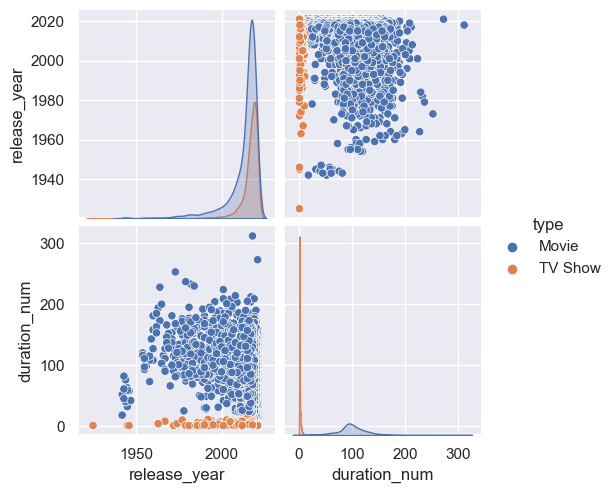

In [46]:
sns.pairplot(df, hue='type')